In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

In [2]:
model = 'LDDR'

In [3]:
file_path_input_params_json = '../../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'SI/S17_external_oscillations/transition_vary_noise_strength'
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path /home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S17_external_oscillations/transition_vary_noise_strength
parameter_path /home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S17_external_oscillations/transition_vary_noise_strength/parameter_set.csv


In [4]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)
colors = [pinkish_red, blue, green, dark_blue, yellow]

n_bins = 20
n_min_per_bin = 15

# Random error

In [5]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = makeDataframe.add_average_values_to_df(data_frame)
data_frame = makeDataframe.add_theoretical_init_reg_concentrations_to_df(data_frame)

['/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S17_external_oscillations/transition_vary_noise_strength/noise_strength_DnaA_100_lipids_1000',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S17_external_oscillations/transition_vary_noise_strength/LDDR_transition_delta.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S17_external_oscillations/transition_vary_noise_strength/noise_strength_DnaA_50_lipids_1000',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S17_external_oscillations/transition_vary_noise_strength/noise_strength_DnaA_5_lipids_1000',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S17_external_oscillations/transition_vary_noise_strength/LDDR_transition_vb.pdf']


## Plot correlation added initiation volume with initiation volume

In [5]:
def return_array_of_initiation_volumes(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['v_init_per_ori'], data_frame['t_init']

def return_array_of_initiation_and_birth_volumes(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['v_init_per_ori'], data_frame['t_init'], data_frame['v_b_before_init']

In [6]:
import scipy.stats

def return_sem(np_array):
#     print('np_array', np_array)
    if np_array.size == 0:
#         print('size of np array in return_sem was zero')
        return np.nan
    else:
        df = pd.DataFrame(data=np_array)
#         print('df', df)
#         print('sem', df.sem())
        return df.sem()

def given_dataframe_return_bins_with_mean_sem(data_frame, data_x, data_y, n_bins, n_min_per_bin):
    x_max = data_frame[data_x].max()
    x_min = data_frame[data_x].min()
    bin_np, bin_pos = np.histogram(data_frame[data_x], bins=np.linspace(x_min, x_max, n_bins))
    minpos = bin_pos[np.where(bin_np>n_min_per_bin)[0][0]]
    maxpos = bin_pos[np.where(bin_np>n_min_per_bin)[0][-1]]
    return fig_data[(fig_data.data_x>minpos)&(fig_data.data_x<maxpos)]

def return_label_relaxation_rate(relaxation_rate, correlation):
    return r'$\theta$= {}, R= {} '.format(np.round(relaxation_rate, 3),
                                        np.round(correlation, 3))

def return_label_doubling_time(doubling_time, correlation):
    return r'$\tau_{{\rm d}}$= {}, R= {} '.format(np.round(doubling_time, 3),
                                        np.round(correlation, 3))

def return_label_number_samples(number, correlation):
    return r'N= {}, R= {} '.format(np.round(number, 3),
                                        np.round(correlation, 3))

def return_label_dnaA_noise(noise_strength_total_dnaA):
    return r'$D_D$= {}'.format(np.round(noise_strength_total_dnaA, 3))


def return_label_correlation(correlation):
    return r'$R$= {}'.format(np.round(correlation, 3))


def make_basal_rate_legend(basal_rate_initiator_0):
    return r'$\phi_0={} \times 10^{{-3}}$'.format(int(basal_rate_initiator_0/500))

mean: 0.19418789020031502 std: 0.008817981598529336 CV: 0.045409533979864164
basal_rate 5000.0 index 2
Leght of data frame: 995
mean: 0.19198436628202176 std: 0.011647489487710149 CV: 0.060668947754840545
basal_rate 5000.0 index 1
Leght of data frame: 996
mean: 0.1912253705079903 std: 0.01377806807837438 CV: 0.07205146493780054
basal_rate 5000.0 index 0
Leght of data frame: 995
[ 68. 253. 298. 205. 105.  41.  16.   7.   1.   1.]
[ 13. 102. 263. 306. 182.  81.  23.  21.   3.   2.]
[ 37. 130. 288. 270. 152.  69.  33.  11.   2.   3.]


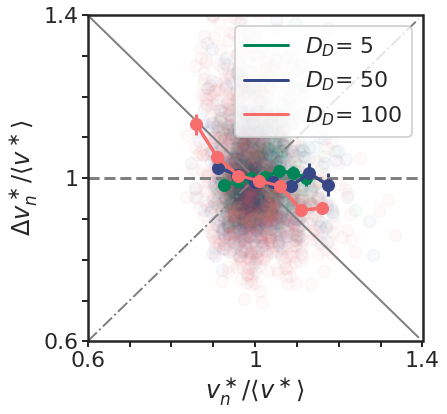

In [7]:
sns.set(style="white")
sns.set_context("poster")
sns.set_style("ticks")
df_correlations = []
data_frame_sorted = data_frame.sort_values(by=['noise_strength_total_dnaA'])

for index, row in data_frame_sorted.iterrows():
    v_init_per_ori, t_init = return_array_of_initiation_volumes(row.path_dataset)
    v_init_np = v_init_per_ori.to_numpy()
    v_init_np = v_init_np[3:]
    print('mean:', np.mean(v_init_np), 'std:', np.std(v_init_np), 'CV:', np.std(v_init_np)/np.mean(v_init_np))
    print('basal_rate', row.basal_rate_initiator_0, 'index', index)
    df_item = pd.DataFrame({"v_init" : v_init_np[:-1],
                            "delta_v_init" : 2*v_init_np[1:]-v_init_np[:-1],
                            "v_init_rescaled" : v_init_np[:-1]/np.mean(v_init_np),
                            "delta_v_init_rescaled" : (2*v_init_np[1:]-v_init_np[:-1])/np.mean(v_init_np),
                            "relaxation_rate": row.relaxation_rate,
                            "doubling_time": 1/row.doubling_rate,
                            "noise_strength_total_dnaA": int(row.noise_strength_total_dnaA),
                            "basal_rate_initiator_0": row.basal_rate_initiator_0,
                                   })
    df_item['correlation'] = df_item['v_init'].corr(df_item['delta_v_init'], method='pearson')
    df_item["color"] = df_item.apply(lambda row: colors[index], axis=1)
    df_item["mean"] = df_item.apply(lambda row: np.mean(v_init_np), axis=1)
    print('Leght of data frame:', len(df_item.index))
    df_correlations.append(df_item)
    
fig, ax = plt.subplots(figsize=(6,6))
for df in df_correlations:
    # plot raw datter as scatter plot
    ax.scatter(df['v_init_rescaled'], 
               df['delta_v_init_rescaled'], 
               alpha=0.03, 
               color=df['color'][0])
    # bin data and plot mean and sem per bin
    bin_count, bin_edges, binnumber = stats.binned_statistic(df['v_init_rescaled'], 
                                                         df['delta_v_init_rescaled'], 
                                                         'count', 
                                                         bins=10)
    print(bin_count)
    bin_means, bin_edges, binnumber = stats.binned_statistic(df['v_init_rescaled'], 
                                                             df['delta_v_init_rescaled'], 
                                                             'mean', 
                                                             bins=10)
    
#     print('mean', bin_means)
    bin_sem, bin_edges, binnumber = stats.binned_statistic(df['v_init_rescaled'], 
                                                             df['delta_v_init_rescaled'], 
                                                             return_sem, 
                                                             bins=10)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2

    bin_means_cut = bin_means[bin_count >=n_min_per_bin]
    bin_centers_cut = bin_centers[bin_count >=n_min_per_bin]
    bin_sem_cut = bin_sem[bin_count >=n_min_per_bin]
    ax.plot(bin_centers_cut, bin_means_cut, c=df['color'][0], label=return_label_dnaA_noise(df['noise_strength_total_dnaA'][0]))
    
#     ax.plot(bin_centers_cut, bin_means_cut, c=df['color'][0], label=return_label_doubling_time(df['doubling_time'][0],
#                                                                           df['correlation'][0]))
    ax.errorbar(bin_centers_cut, bin_means_cut, yerr=bin_sem_cut, marker='o', c=df['color'][0])
#     ax.axhline(df["mean"][0], linestyle='--', linewidth=3, color=blue)
    ax.plot()
    
ax.axhline(1, linestyle='--', linewidth=3, color='grey')
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5)
sizer_line = np.arange(0.6, 1.4, 0.01)
ax.plot(sizer_line, sizer_line, linewidth=2, color='grey', linestyle='-.')
ax.plot(sizer_line, 2-sizer_line, linewidth=2, color='grey')
ax.set_yticks([0.6, 0.7,  0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
ax.set_yticklabels(['0.6', ' ',  ' ', ' ', '1', ' ', ' ', ' ', '1.4']) 
ax.set_xticks([0.6, 0.7,  0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
ax.set_xticklabels(['0.6', ' ',  ' ', ' ', '1', ' ', ' ', ' ', '1.4']) 
ax.set(ylim=(0.6, 1.4))
ax.set(xlim=(0.6, 1.4))
ax.legend(loc='upper right')
ax.set(xlabel=r'$v^\ast_n / \langle v^\ast \rangle$', ylabel=r'$\Delta v^\ast_n / \langle v^\ast \rangle$')
plt.savefig(file_path + '/'+model+'_transition_delta.pdf', format='pdf', bbox_inches='tight')
    

## Correlation initiation volume with birth volume

In [8]:
def return_array_of_initiation_and_birth_volumes(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['v_init_per_ori'], data_frame['t_init'], data_frame['v_b_before_init']

[ 68. 253. 298. 205. 105.  41.  16.   7.   1.   1.]
[ 37. 130. 288. 270. 152.  69.  33.  11.   2.   3.]
[ 13. 102. 263. 306. 182.  81.  23.  21.   3.   2.]


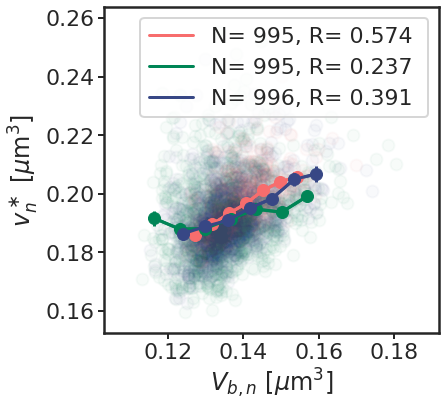

In [19]:
sns.set(style="white")
sns.set_context("poster")
sns.set_style("ticks")
df_correlations = []
data_frame = data_frame.sort_values(by=['relaxation_rate'])

for index, row in data_frame.iterrows():    
    v_init_per_ori, t_init, v_b_before_init = return_array_of_initiation_and_birth_volumes(row.path_dataset)
    v_init_np = v_init_per_ori.to_numpy()
    v_b_before_init_np = v_b_before_init.to_numpy()
    v_b_before_init_np = v_b_before_init_np[3:]
    v_init_np = v_init_np[3:]
    df_item = pd.DataFrame({"v_init" :  v_init_np[1:],
                            "v_b_before_init" : v_b_before_init_np[1:],
                            "relaxation_rate": row.relaxation_rate,
                            "doubling_time": 1/row.doubling_rate
                                   })
    df_item['correlation'] = df_item['v_b_before_init'].corr(df_item['v_init'], method='pearson')
    df_item["color"] = df_item.apply(lambda row: colors[index], axis=1)
    df_correlations.append(df_item)
    
fig, ax = plt.subplots(figsize=(6,6))
for df in df_correlations:
    # plot raw datter as scatter plot
    ax.scatter(df['v_b_before_init'], 
               df['v_init'], 
               alpha=0.03, 
               color=df['color'][0])
    # bin data and plot mean and sem per bin
    bin_count, bin_edges, binnumber = stats.binned_statistic(df['v_b_before_init'], 
                                                     df['v_init'], 
                                                     'count', 
                                                     bins=10)
    print(bin_count)
    
    bin_means, bin_edges, binnumber = stats.binned_statistic(df['v_b_before_init'], 
                                                             df['v_init'], 
                                                             'mean', 
                                                             bins=10)
    
    bin_sem, bin_edges, binnumber = stats.binned_statistic(df['v_b_before_init'], 
                                                             df['v_init'], 
                                                             return_sem, 
                                                             bins=10)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    # take out bins with less than 15 samples
    bin_means_cut = bin_means[bin_count >=n_min_per_bin]
    bin_centers_cut = bin_centers[bin_count >=n_min_per_bin]
    bin_sem_cut = bin_sem[bin_count >=n_min_per_bin]
    
    ax.plot(bin_centers_cut, bin_means_cut, c=df['color'][0], label=return_label_number_samples(len(df.index),
                                                                          df['correlation'][0]))
#     ax.plot(bin_centers_cut, bin_means_cut, c=df['color'][0], label=return_label_doubling_time(df['doubling_time'][0],
#                                                                       df['correlation'][0]))
    ax.errorbar(bin_centers_cut, bin_means_cut, yerr=bin_sem_cut, marker='o', c=df['color'][0])
    ax.plot()
    
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5)
# ax.set_yticks([0.25, 0.3, 0.35])
# ax.set_yticklabels([  r'0.25', r'0.3', r'0.35'])   
# ax.set_yticks([0.1, 0.2,  0.3])
# ax.set_yticklabels([ r'0.1', r'0.2', r'0.3'])    
# ax.set(ylim=(0.05,0.35))
# ax.set(xlim=(0.05,0.35))
ax.legend(loc='upper right')
ax.set(xlabel=r'$V_{b, n}$ [$\mu$m$^3$]', ylabel=r'$v^\ast_n$ [$\mu$m$^3$]')
plt.savefig(file_path + '/'+model+'_transition_vb.pdf', format='pdf', bbox_inches='tight')
    